In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


To avoid Overshooting Loss function
Choose small learning rate default 0.001 here we have taken 0.0001
There may be chance of underfitting so increase number of neuron
Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture 
relevant feature or model is confusing due to lack of feature so feed with more feature

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential

In [6]:
model= Sequential()

In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\kedar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [17]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

Compiling Model

In [18]:
import tensorflow as tf
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [20]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1677s 762ms/step - accuracy: 0.4178 - loss: 2.0650 - val_accuracy: 0.8574 - val_loss: 0.4518
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1354s 616ms/step - accuracy: 0.8419 - loss: 0.5066 - val_accuracy: 0.8580 - val_loss: 0.4432
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1336s 608ms/step - accuracy: 0.9077 - loss: 0.2960 - val_accuracy: 0.9408 - val_loss: 0.1847
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2580s 1s/step - accuracy: 0.9367 - loss: 0.1965 - val_accuracy: 0.9432 - val_loss: 0.1782
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1364s 621ms/step - accuracy: 0.9523 - loss: 0.1472 - val_accuracy: 0.9498 - val_loss: 0.1595
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1342s 611ms/step - accuracy: 0.9609 - loss: 0.1170 - val_accuracy: 0.9417 - val_loss: 0.1870
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2155s 981ms/step - accuracy: 0.9701 - loss: 0.0896 - val_accuracy: 0.9519 - val_loss: 0.1566
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1694s 771ms/step - accuracy

In [ ]:
Model Evaluation on Training Set

In [21]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training loss:', train_loss)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 524s 238ms/step - accuracy: 0.9935 - loss: 0.0204
Training loss: 0.019108107313513756
Training accuracy: 0.9939255714416504


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation loss:', val_loss)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 115s 209ms/step - accuracy: 0.9705 - loss: 0.1045
Validation loss: 0.09932362288236618
Validation accuracy: 0.9722285270690918


Saving Model

In [24]:
cnn.save('trained_plant_disease_model.keras')

In [25]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6133295297622681,
  0.8630343675613403,
  0.9160395264625549,
  0.9401806592941284,
  0.9561704397201538,
  0.9644071459770203,
  0.9714915752410889,
  0.9763283133506775,
  0.9793157577514648,
  0.9817910194396973],
 'loss': [1.313611626625061,
  0.4329836070537567,
  0.2643653154373169,
  0.18440470099449158,
  0.1351889818906784,
  0.10785990953445435,
  0.08623114228248596,
  0.07259371131658554,
  0.06550062447786331,
  0.055434539914131165],
 'val_accuracy': [0.857443630695343,
  0.8580127358436584,
  0.9407580494880676,
  0.9432051181793213,
  0.9498065114021301,
  0.9416685700416565,
  0.9518552422523499,
  0.9709765315055847,
  0.9731391072273254,
  0.9722285270690918],
 'val_loss': [0.4517577290534973,
  0.4431915879249573,
  0.18468405306339264,
  0.178247332572937,
  0.15945996344089508,
  0.18695224821567535,
  0.1566077470779419,
  0.09425264596939087,
  0.09085385501384735,
  0.09932359308004379]}

In [26]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Accuracy Visualization

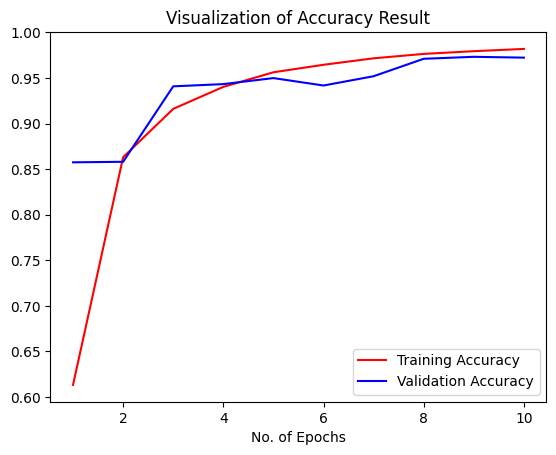

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

Model Evaluation Techniques

In [29]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 357s 20ms/step


In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.97      0.98       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.95      0.96       440
                                   Apple___healthy       0.97      0.98      0.98       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

Confusion Matrix

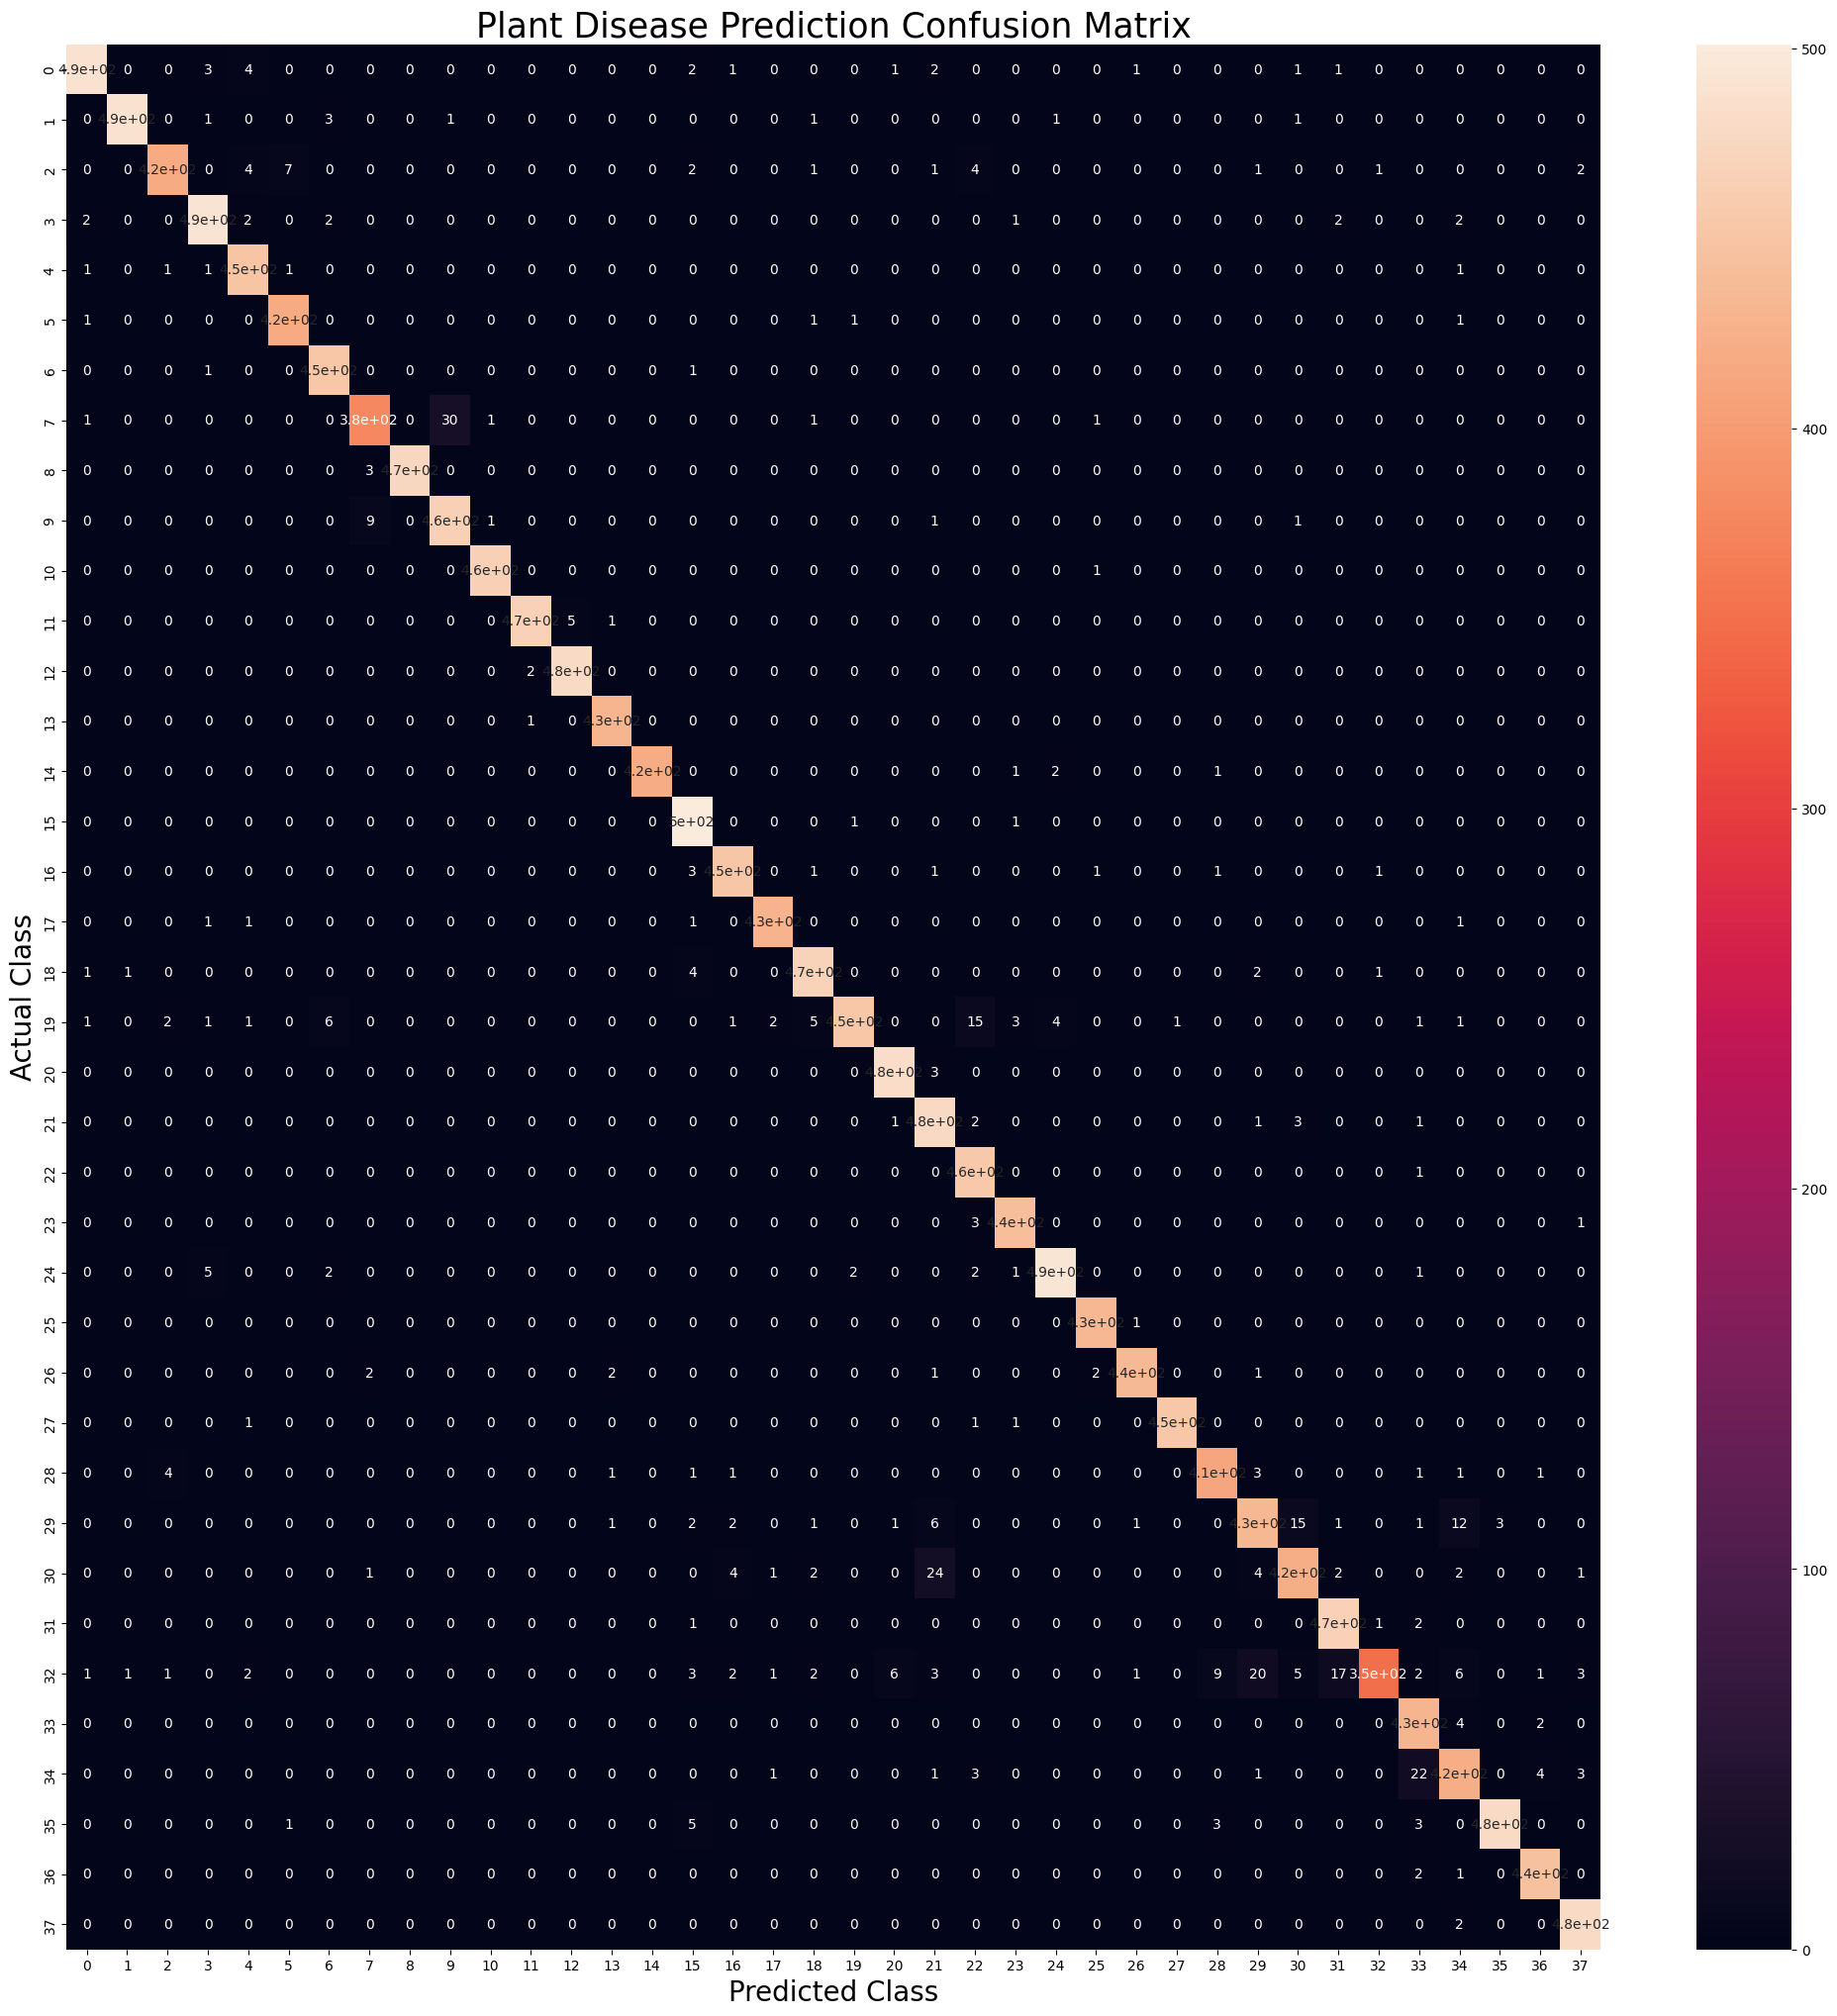

In [38]:
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

ROC Curve

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 223s 13ms/step


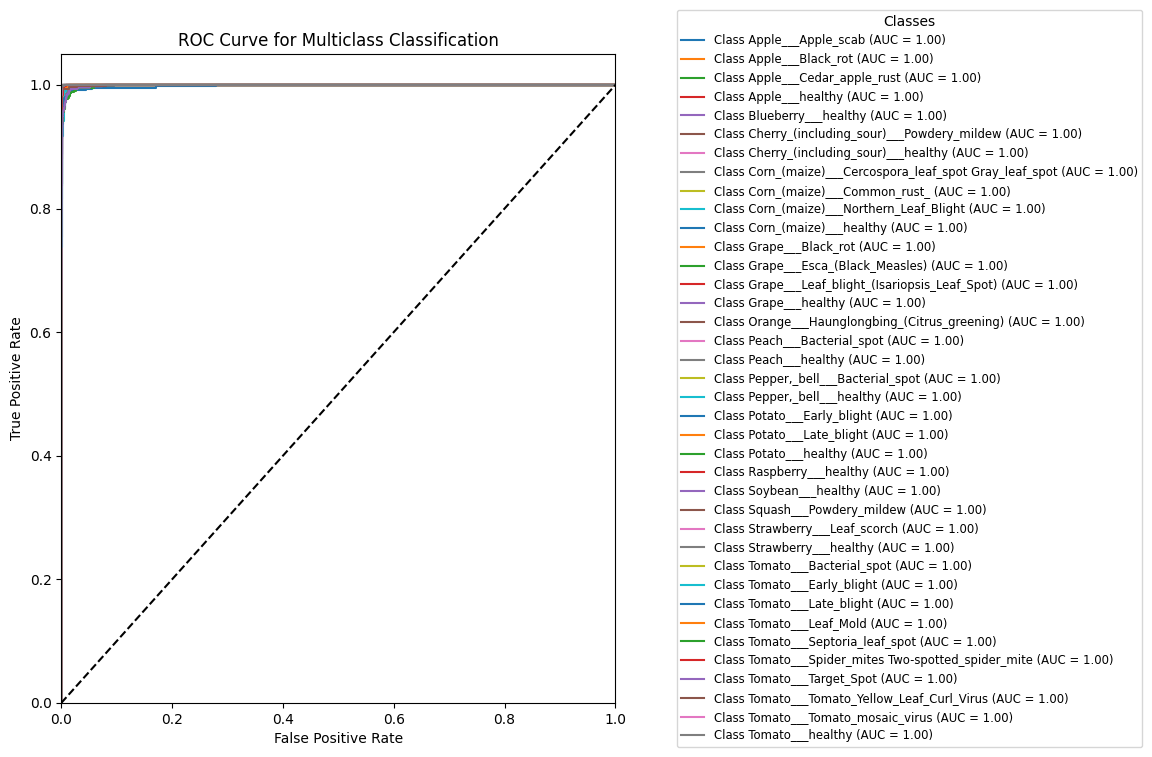

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get the number of classes
num_classes = len(class_name)

# Binarize the true labels for ROC curve calculation
Y_true_binarized = label_binarize(Y_true, classes=np.arange(num_classes))

# Calculate the predicted probabilities
y_pred_prob = cnn.predict(test_set)

# Plotting the ROC curves for each class
plt.figure(figsize=(12, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(Y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_name[i]} (AUC = {roc_auc:.2f})')

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')

# Adjust legend settings
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize='small', title="Classes")  # Move legend further to the right
plt.tight_layout()  # Adjusts the layout to make room for the legend

plt.show()
